<h1> Language Model with Add1-Smoothing (Laplace smoothing)</h1>

\begin{align*}
P(w_i|w_{i-1})=\frac{1+c(w_{i-1},w_i)}{c(w_i,*)+|v|}
\end{align*}
<p>$v$ = vocabulary size <br>
$c(x)$ = count of $x$ in corpus</p>

<p> <code>Note:<code> If any changes you make in <code>language_model.ipynb<code>. 
In order to changes to reflect in this or any notebook that imported the file <code>language_model.ipynb<code>, 
you must restart the Kernel from the Kernel Tab Available above.<\p>

In [1]:
%%capture
import import_ipynb
from language_model import *

# Wikipedia articles

In [2]:
filenames=read_filename('./wikipedia/', 500)

In [3]:
sents=create_tokens(filenames)

In [4]:
train_corpus, test_corpus=train_test_split(sents)

<h3>Obtaining probality distribution with Add1 smoothing for Unigrams</h3>

In [5]:
fd_1gram=ngram_freq_dist(train_corpus, ngram=1)
cpd_1gram_with_add1=nltk.LaplaceProbDist(fd_1gram) #Obtaining probality distribution with Add1 
#smoothing for unigram

In [6]:
vocab=len(fd_1gram) #vocabulary size

<h3>Obtaining conditional probality distribution with Add1 smoothing for Bigrams</h3>

In [7]:
cfd_2gram=ngram_freq_dist(train_corpus, ngram=2)
cpd_2gram_with_add1 = nltk.ConditionalProbDist(cfd_2gram, nltk.LaplaceProbDist, bins=pow(vocab,2))

In [8]:
#cpd_2gram_with_add1 = nltk.ConditionalProbDist(cfd_2gram, nltk.SimpleGoodTuringProbDist, bins=pow(vocab,2))

In [9]:
#dict(cpd_2gram_with_add1['azerbaijan'].freqdist())

<h3>Obtaining conditional probality distribution with Add1 smoothing for Trigrams</h3>

In [10]:
cfd_3gram=ngram_freq_dist(train_corpus, ngram=3)
cpd_3gram_with_add1 = nltk.ConditionalProbDist(cfd_3gram, nltk.LaplaceProbDist,bins=pow(vocab,3))

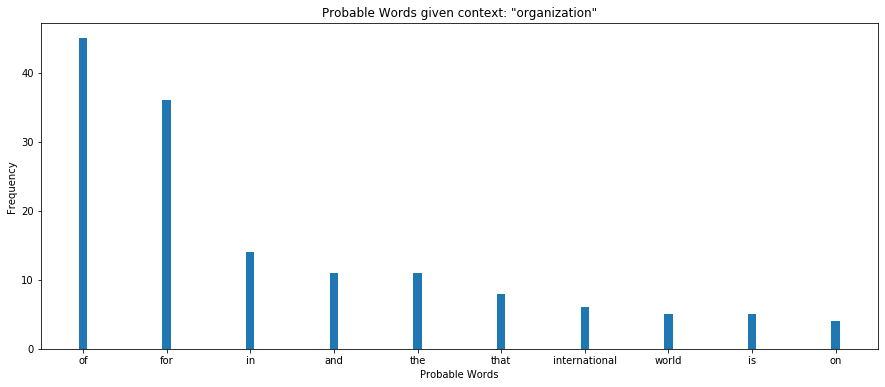

In [11]:
pws_2gram=probable_words('the world health organization', cpd_2gram_with_add1, 2)

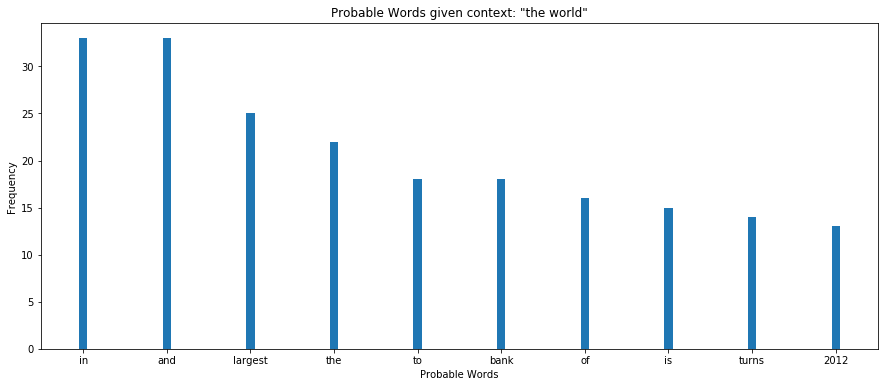

In [12]:
pws_3gram=probable_words('the world', cpd_3gram_with_add1, 3)

In [13]:
pws_3gram

[('in', 33),
 ('and', 33),
 ('largest', 25),
 ('the', 22),
 ('to', 18),
 ('bank', 18),
 ('of', 16),
 ('is', 15),
 ('turns', 14),
 ('2012', 13),
 ('at', 13),
 ('with', 13)]

In [14]:
test_sent1='iran has an embassy in baku'
test_sent2='iran embassy has an in baku'

In [15]:
prob_1gram=find_sent_prob(test_sent2, cpd_1gram_with_add1)
print(prob_1gram)

9.634121745125834e-20


In [18]:
prob_2gram=find_sent_prob(test_sent2,cpd_1gram_with_add1, cpd_2gram_with_add1, ngram=2)
print(prob_2gram)

7.888043404411847e-51


In [20]:
prob_3gram=find_sent_prob(test_sent1,cpd_1gram_with_add1, cpd_2gram_with_add1, cpd_3gram_with_add1, ngram=3)
print(prob_3gram)

3.0274623808328916e-67


In [21]:
entropy(cpd_1gram_with_add1, test_corpus, 1)

0.040833302562920434

In [22]:
entropy(cpd_2gram_with_add1, test_corpus, 2)

6.661979937043392e-07

In [23]:
entropy(cpd_3gram_with_add1, test_corpus, 3)

2.316376816349217e-13

In [24]:
perplexity(cpd_1gram_with_add1, test_corpus, 1)

1.0287078380959342

In [25]:
perplexity(cpd_2gram_with_add1, test_corpus, 2)

1.0000004617733675

In [26]:
perplexity(cpd_3gram_with_add1, test_corpus, 3)

1.0000000000001605

In [27]:
text_wiki=generate_txt_bigram_model(cpd_2gram_with_add1, 'the', numwords=10)

In [28]:
text_wiki

'the sabc has but render honors frank b. yeats and surprising'

# NLTK Brown Corpus

In [29]:
#nltk.corpus.brown.categories()

In [30]:
all_categories_text=brown_corpus_categories_text()

In [31]:
sents=create_tokens(all_categories_text)
train_corpus, test_corpus=train_test_split(sents)

In [32]:
fd_1gram=ngram_freq_dist(train_corpus, ngram=1)
cpd_1gram_with_add1=nltk.LaplaceProbDist(fd_1gram)
vocab=len(fd_1gram)
cfd_2gram=ngram_freq_dist(train_corpus, ngram=2)
cpd_2gram_with_add1 = nltk.ConditionalProbDist(cfd_2gram, nltk.LaplaceProbDist, bins=pow(vocab,2))

cfd_3gram=ngram_freq_dist(train_corpus, ngram=3)
cpd_3gram_with_add1 = nltk.ConditionalProbDist(cfd_3gram, nltk.LaplaceProbDist, bins=pow(vocab,3))

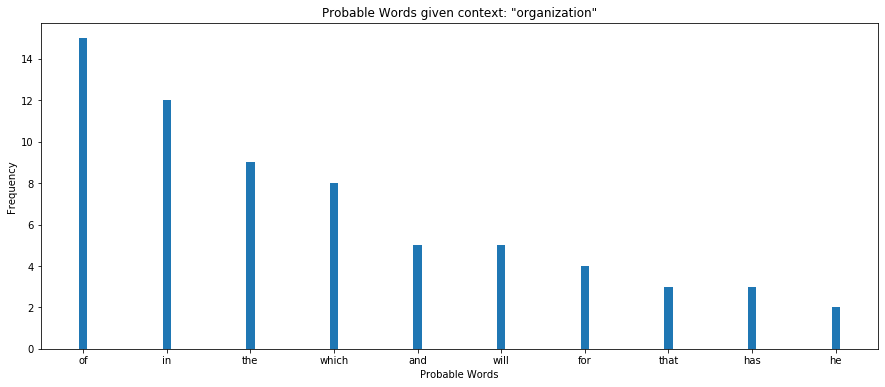

In [33]:
pws_2gram=probable_words('the world health organization', cpd_2gram_with_add1, 2)

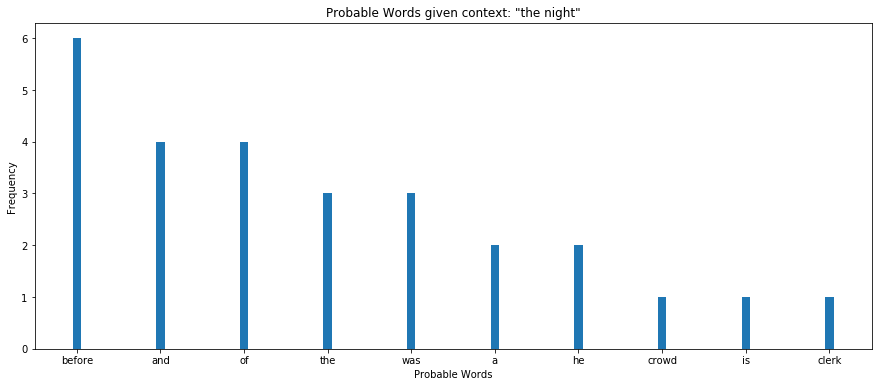

In [34]:
pws_3gram=probable_words('the night', cpd_3gram_with_add1, 3)

In [35]:
test_sent1='iran has an embassy in baku'
test_sent2='iran embassy has an in baku'

prob_1gram=find_sent_prob(test_sent1, cpd_1gram_with_add1, ngram=1)
print(prob_1gram)

prob_2gram=find_sent_prob(test_sent2, cpd_1gram_with_add1, cpd_2gram_with_add1, ngram=2)
print(prob_2gram)

prob_3gram=find_sent_prob(test_sent1,cpd_1gram_with_add1, cpd_2gram_with_add1, cpd_3gram_with_add1, ngram=3)
print(prob_3gram)

1.979810869984714e-23
3.085248639528914e-51
1.554414304566294e-71


In [36]:
print(entropy(cpd_1gram_with_add1, test_corpus, 1))

print(entropy(cpd_2gram_with_add1, test_corpus, 2))

print(entropy(cpd_3gram_with_add1, test_corpus, 3))

print(perplexity(cpd_1gram_with_add1, test_corpus, 1))

print(perplexity(cpd_2gram_with_add1, test_corpus, 2))

print(perplexity(cpd_3gram_with_add1, test_corpus, 3))

0.04170287403499804
1.430867415573358e-06
1.3358112503116896e-12
1.0293280694021945
1.0000009918022066
1.000000000000926


In [37]:
text_brown=generate_txt_bigram_model(cpd_2gram_with_add1, 'the', numwords=10)

In [38]:
text_brown

'the bestseller lists and zealous volunteers but sympathetic side are definitely'

In [ ]:
#nltk_brown_corpus()